In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_excel(r'E:\jupiter excel_csv files\titanic_dataset.xlsx',sheet_name="titanic_dataset")

In [122]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
df.shape

(891, 12)

In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

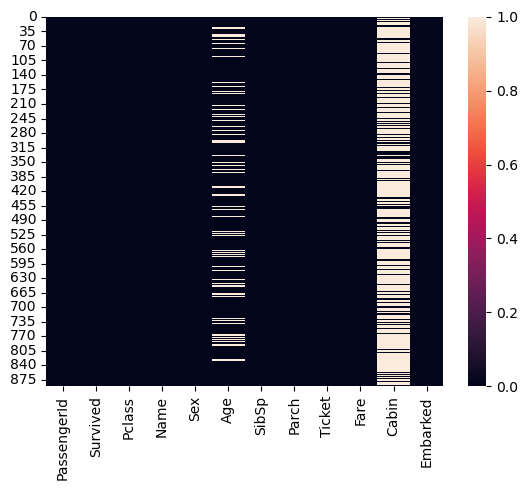

In [126]:
sns.heatmap(df.isna())  #white line represent null values

In [127]:
df.drop(['Cabin'],axis = 1,inplace = True)

In [128]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [129]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [130]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [131]:
#Another ways
df.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [132]:
pd.pivot_table(df,index='Embarked',values=['PassengerId'],aggfunc='count').reset_index()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


In [133]:
  #Handling missing values embarked column
df['Embarked'] = df['Embarked'].fillna('S')

In [134]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

 Handling missing values Age column. we can also use mean,median,mode

In [135]:

mean_age =df['Age'].mean()
mean_age

29.69911764705882

In [136]:
std_age = df['Age'].std()
std_age

14.526497332334044

In [137]:
 #How the age spread from mean left side
low_age = mean_age - std_age
low_age


15.172620314724776

In [138]:
 #How the age spread from mean right side
High_age = mean_age + std_age
High_age

44.225614979392866

In [139]:
rand_age = np.random.randint(15,45,177)  
rand_age

array([26, 19, 19, 33, 20, 32, 36, 29, 23, 16, 38, 28, 40, 22, 15, 18, 25,
       26, 42, 40, 20, 16, 34, 24, 17, 20, 27, 36, 15, 29, 35, 18, 25, 15,
       31, 36, 35, 25, 44, 24, 22, 29, 34, 26, 30, 30, 26, 32, 29, 25, 17,
       32, 44, 24, 33, 44, 22, 33, 23, 29, 39, 21, 29, 16, 30, 38, 36, 28,
       42, 27, 42, 27, 39, 22, 21, 24, 37, 19, 16, 40, 23, 36, 23, 23, 35,
       39, 18, 24, 24, 31, 25, 16, 42, 16, 37, 33, 37, 17, 28, 37, 44, 25,
       43, 24, 27, 44, 36, 40, 42, 24, 29, 38, 21, 27, 23, 19, 44, 33, 31,
       17, 24, 22, 37, 38, 23, 39, 17, 33, 17, 32, 21, 29, 23, 42, 30, 17,
       41, 33, 36, 40, 23, 26, 35, 26, 26, 26, 39, 28, 17, 31, 27, 36, 24,
       44, 19, 37, 18, 43, 42, 39, 40, 29, 40, 40, 37, 30, 32, 18, 21, 32,
       21, 32, 30, 25, 15, 29, 21])

In [140]:
age_copy = df['Age'].copy()
age_copy

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [141]:
age_copy[np.isnan(age_copy)] = rand_age   #df['Age'][np.isnan(df['Age'])] = np.random.randint(15,45,177)  (This is direct way)
age_copy

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [142]:
#Above code explanation
df['Age'][np.isnan(df['Age'])]  #df.loc[df['Age'].isna(), 'Age'] --(Another method)


5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [31]:
type(age_copy)

pandas.core.series.Series

In [32]:
df['Age']=age_copy

In [33]:
df['Age'].isnull().sum()

0

In [34]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 41.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 33.  , 34.  , 15.  ,
       28.  ,  8.  , 24.  , 19.  , 42.  , 30.  , 40.  , 43.  , 66.  ,
       36.  , 21.  , 18.  , 37.  ,  3.  , 32.  ,  7.  , 49.  , 29.  ,
       65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 16.  , 25.  ,  0.83,
       23.  , 46.  , 59.  , 71.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,
        9.  , 36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  ,
       50.  , 45.5 , 20.5 , 62.  , 52.  , 63.  , 23.5 ,  0.92, 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [35]:
 df['Age'].min()

0.42

In [36]:
df[df['Age'] == df['Age'].min()]  #see all row


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


In [37]:
df['Age'].min(),df['Age'].max()

(0.42, 80.0)

In [38]:
df['Survived'].unique()  # 1 means survied. 0 not survived

array([0, 1], dtype=int64)

In [39]:
  #Survived count
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
df['Survived'].value_counts() *100 / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<Axes: >

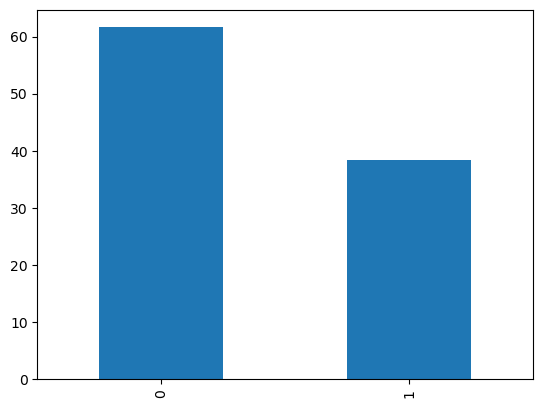

In [41]:
        #survived count percentage
(df['Survived'].value_counts() *100 / len(df)).plot(kind = 'bar')

In [42]:
pd.pivot_table(df,index =['Survived'],values =['Sex'],aggfunc = 'count') #Another way

,Sex
Survived,
0,549
1,342


In [43]:
pd.pivot_table(df,index =['Survived'],values =['PassengerId'],aggfunc = 'count') #Another way

,PassengerId
Survived,
0,549
1,342


In [44]:
df.Sex.value_counts()  #Male,female count

male      577
female    314
Name: Sex, dtype: int64

In [45]:
df.groupby('Sex')['Pclass'].count() #Another way, we can also use pivot table

Sex
female    314
male      577
Name: Pclass, dtype: int64

In [46]:
df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [47]:
  #survived count genderwise
pd.pivot_table(df,index ='Sex',values = 'PassengerId',columns = 'Survived' ,aggfunc ='count')

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

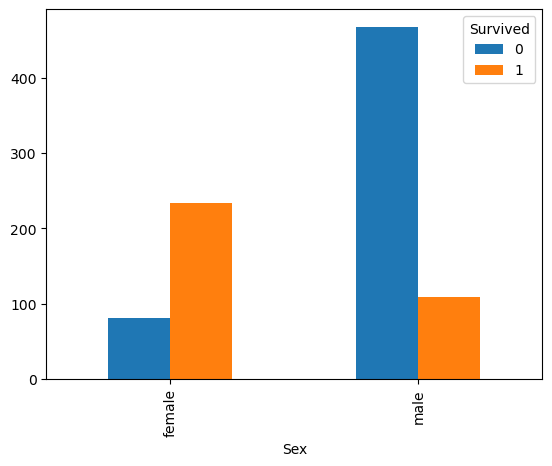

In [48]:
pd.pivot_table(df,index ='Sex',values = 'PassengerId',columns = 'Survived' ,aggfunc ='count').plot(kind = 'bar')

In [49]:
        #survived percentage genderwise
pd.pivot_table(df,index ='Sex',values = 'PassengerId',columns = 'Survived' ,aggfunc ='count')/len(df)

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


<Axes: xlabel='Sex'>

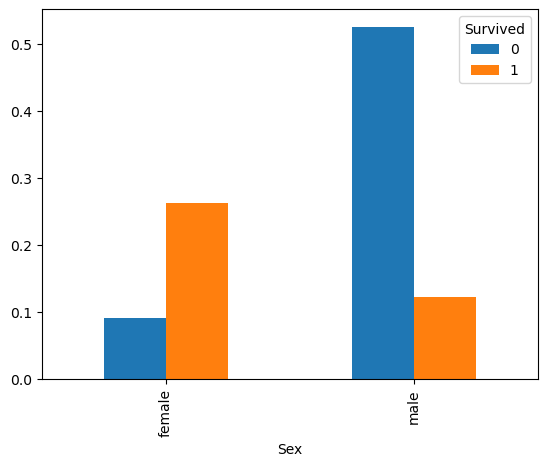

In [50]:
(pd.pivot_table(df,index ='Sex',values = 'PassengerId',columns = 'Survived' ,aggfunc ='count')/len(df)).plot(kind = 'bar')

In [51]:
pd.crosstab(df['Sex'],df['Survived']) #Another way

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

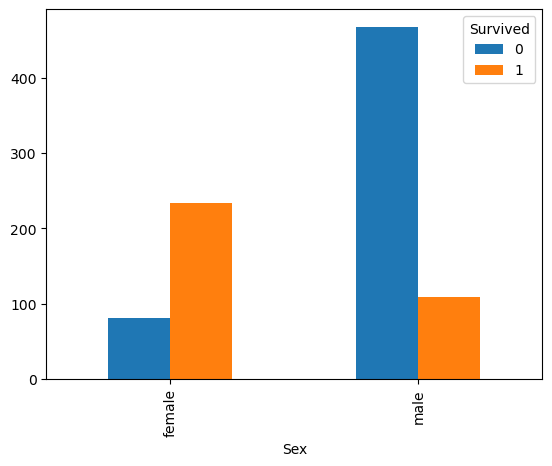

In [52]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind = 'bar')

In [53]:
pd.crosstab(df['Sex'],df['Survived'])/len(df)

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [54]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

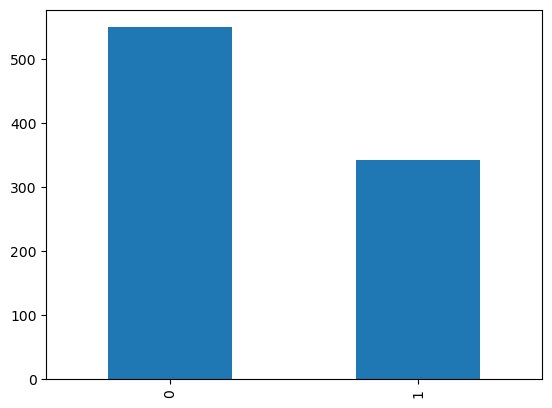

In [55]:
df['Survived'].value_counts().plot(kind = 'bar')

<Axes: >

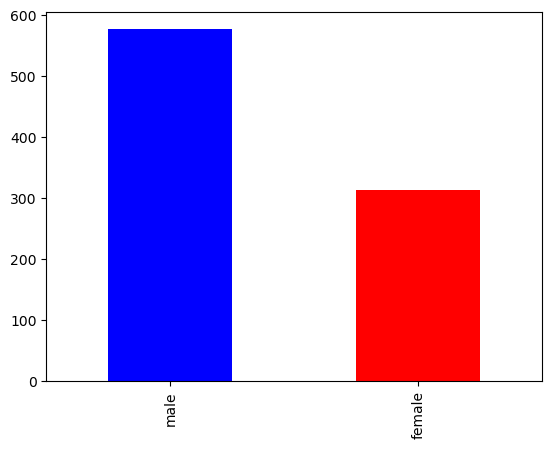

In [56]:
df["Sex"].value_counts().plot(kind='bar',
                             color =['b','r'])      

<Axes: >

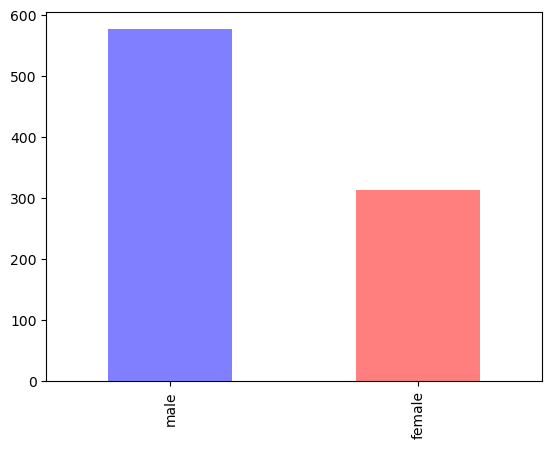

In [57]:
df['Sex'].value_counts().plot(kind = 'bar',color =['b','r'],alpha = 0.5)  #alpha means colour type

<Axes: ylabel='Pclass'>

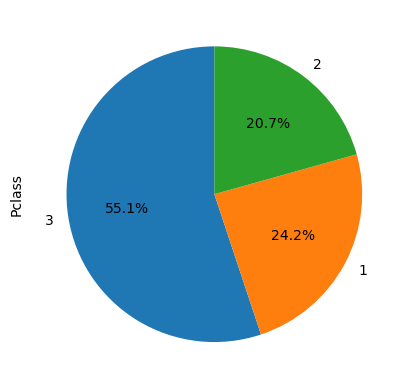

In [58]:
  #autopct means count value inside pie chart
 #startangle = 90 is refers to the circle 90 degree. we may not give the startangle,our choice is this
df['Pclass'].value_counts().plot(kind = 'pie', autopct='%1.1f%%',startangle = 90)

([<matplotlib.patches.Wedge at 0x15e65b8d9c0>,
 [Text(-0.17571616709359641, 1.0858746836637898, ''),
  Text(-0.5160762002061153, -0.9714243951954356, ''),
  Text(0.8765111456658484, -0.6646263698677192, '')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

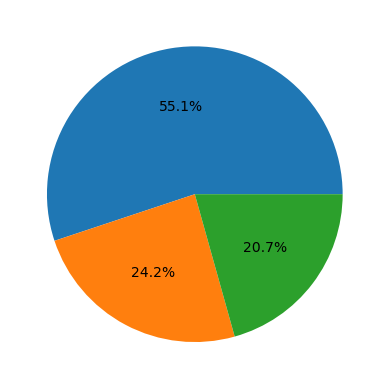

In [59]:
plt.pie(df.Pclass.value_counts(),autopct='%1.1f%%')

<Axes: xlabel='Survived', ylabel='Age'>

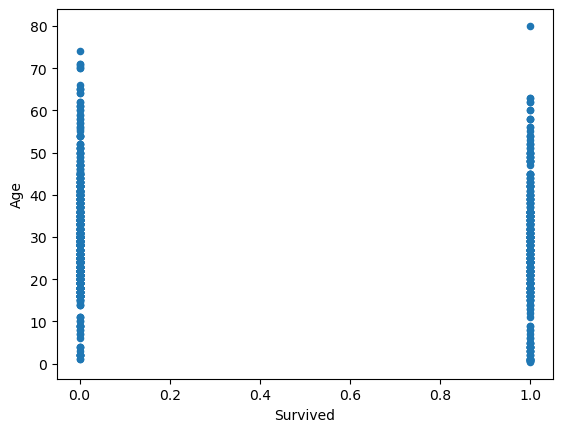

In [60]:
df.plot(kind = 'scatter',x = 'Survived',y ='Age')

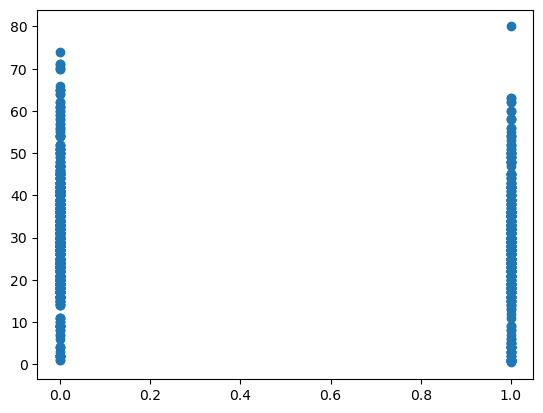

In [61]:
plt.scatter(x=df['Survived'],y=df['Age'])

In [62]:
woman = df[df['Sex'] =='female'][df['Survived']==1]
woman

C:\Users\Nasar Hussian\AppData\Local\Temp\ipykernel_1252\973002604.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  woman = df[df['Sex'] =='female'][df['Survived']==1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


In [63]:
women1 = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]  #Another way
women1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


In [64]:
wom = df[df['Sex'] =='female']  #Anoter way
wom_sur = wom[wom['Survived'] ==1]
wom_sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


In [65]:
wom_notsur = wom[wom['Survived'] ==0]
wom_notsur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,37.0,8,2,CA. 2343,69.5500,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


In [66]:
# men = df[df['Sex']=='male']
# m_sur = men[men['Survived']==1]
# m_notsur = men[men["Survived"]==0]

m_notsur = df[(df['Sex']=='male') & (df['Survived']==0)]
m_sur = df[(df['Sex']=='male') & (df['Survived']==1)]

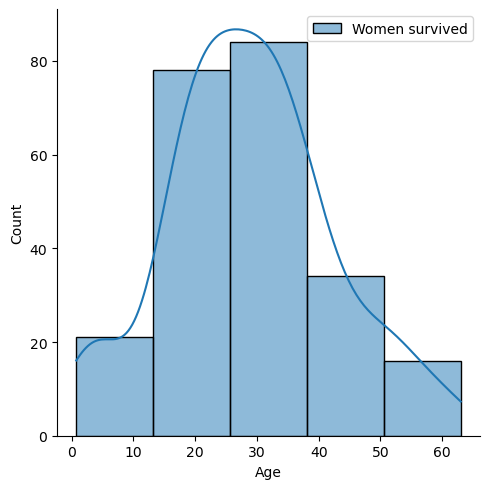

In [67]:
sns.displot(wom_sur['Age'],bins = 5,label ='Women survived',kde = True)  #Kde - Key density estimator
plt.legend()

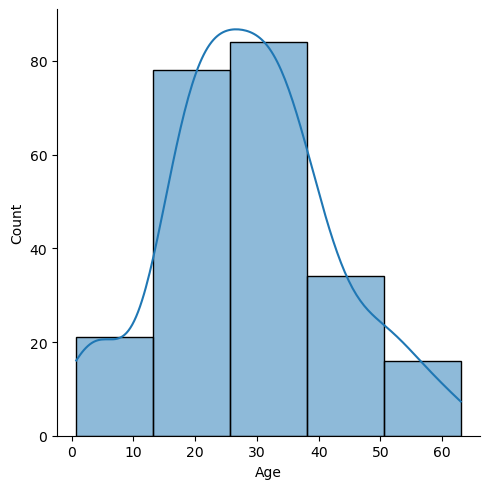

In [68]:
sns.displot(df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Age'],bins =5,kde=True) #Another way

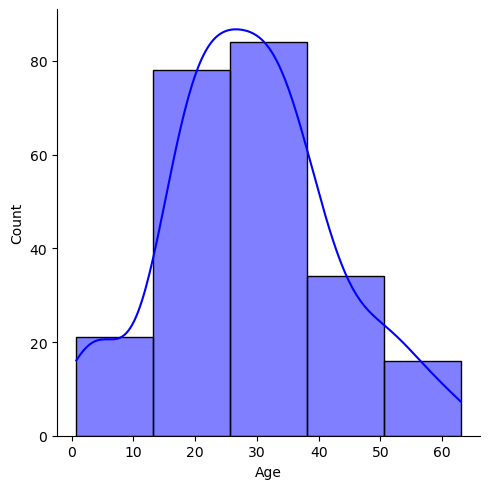

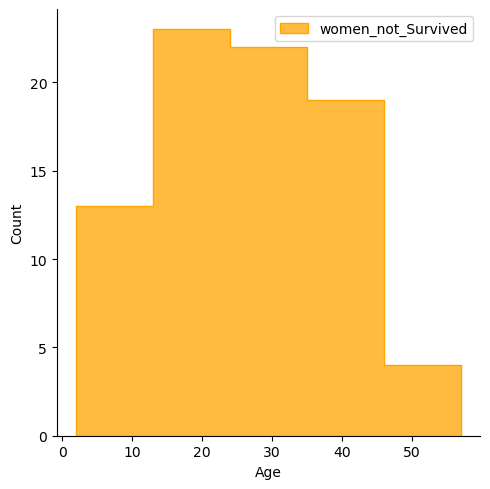

In [69]:
sns.displot(wom_sur.Age,bins = 5,label ='Women_survived',kde = True,color ='blue')
sns.displot(wom_notsur.Age,bins = 5,label ='women_not_Survived',kde = False,element='step',color ='orange')
plt.legend()

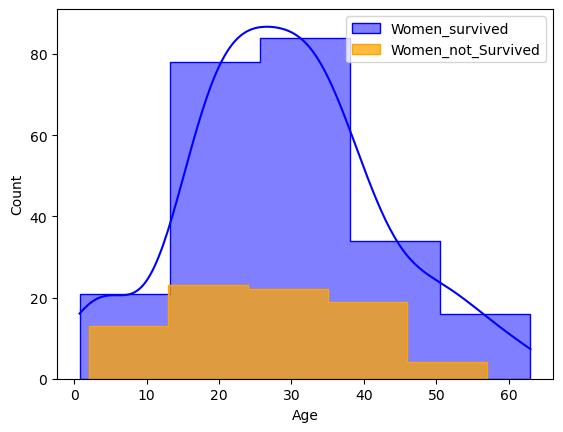

In [70]:
# Plot histogram for women who survived
sns.histplot(wom_sur['Age'], bins=5, label='Women_survived', kde=True, color='blue',element = 'step')

# Plot histogram for women who did not survive
sns.histplot(wom_notsur['Age'], bins=5, label='Women_not_Survived', kde=False, color='orange',element = 'step')

# Add legend
plt.legend()


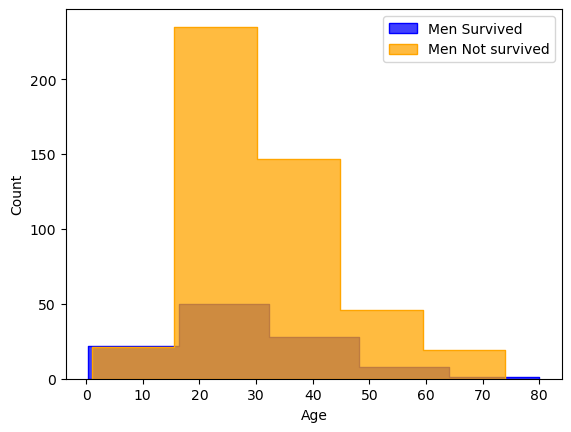

In [71]:
sns.histplot(m_sur.Age,bins = 5,label = 'Men Survived',color ='blue',element = 'step')
sns.histplot(m_notsur['Age'],bins = 5,label='Men Not survived',color ='orange',element ='step') 
plt.legend()

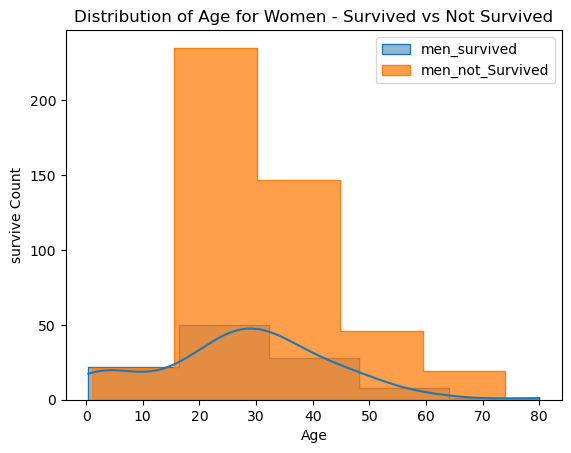

In [72]:
# Plot histogram for women who survived
sns.histplot(m_sur['Age'], bins=5, label='men_survived', kde=True,element = 'step')

# Plot histogram for women who did not survive
sns.histplot(m_notsur.Age, bins=5, label='men_not_Survived',element ="step")
# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Age')
plt.ylabel('survive Count')
plt.title('Distribution of Age for Women - Survived vs Not Survived')
plt.show()

# Encoding

In [73]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,44.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [74]:
    #drop_first use drop any one of the column. for high accuracy
    #this concept is called multicolliniarity drop. here Q and S will display but C not display
dum = pd.get_dummies(df['Embarked'],prefix ='Emb_',drop_first=True)  
dum   
#pd.get_dummies(df,prefix =['Emb_'],columns ='Embarked') ---  another way

,Emb__Q,Emb__S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [75]:
df = pd.concat([df,dum],axis = 1)

In [76]:
  #Drop unwanted column
df = df.drop(['Embarked','Name','Ticket','PassengerId'],axis =1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb__Q,Emb__S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,44.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


# Model Building

In [77]:
X = df.drop('Survived',axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb__Q,Emb__S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,0,19.0,0,0,30.0000,0,1
888,3,0,44.0,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [78]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Example of using StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')    
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8134328358208955
Confusion Matrix:
[[151  23]
 [ 27  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.74      0.71      0.73        94

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [81]:
y_test.value_counts()  #Actual   

0    174
1     94
Name: Survived, dtype: int64

In [82]:
type(y_pred)

numpy.ndarray

In [83]:
print("0",(y_pred==0).sum())   #predict
print("1",(y_pred==1).sum())

0 178
1 90


# Prediction for jack and Rose

In [84]:
X_test.iloc[0]  #sibsp - siblings and spouse,parch - parents and childrens

Pclass     3.000
Sex        1.000
Age       35.000
SibSp      0.000
Parch      0.000
Fare       7.125
Emb__Q     0.000
Emb__S     1.000
Name: 590, dtype: float64

In [85]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [86]:
jack = [[2,1,22,0,0,73.5000,0,1]]
model.predict(jack)

array([0], dtype=int64)

In [87]:
rose = [[1,0,23,1,1,512.32,0,1]]
model.predict(rose)

array([1], dtype=int64)